In [1]:
from EM_procedure import *
import numpy as np
import dynamical_systems as dyn
import tqdm
import matplotlib.pyplot as plt

In [2]:
def sin_flow(x):
    return np.sin(np.pi*x)

def no_drive(n_hidden):
    return lambda _: np.zeros(n_hidden)

dummy_obs = lambda x: x

d = dyn.dynamical_system(n_hidden=1, n_inputs=0, n_outputs=3, flow_function=sin_flow, driving_function=no_drive(1),
                             output_function=dummy_obs)

In [3]:
output, true_hidden = d.generate_trajectory()

[-0.13056466] []
[-0.13056466]
[-0.3800208] []
[-0.3800208]
[-0.90720566] []
[-0.90720566]
[-0.31937328] []
[-0.31937328]
[-0.79164938] []
[-0.79164938]
[-0.71063654] []
[-0.71063654]
[-0.77466954] []
[-0.77466954]
[-0.61224485] []
[-0.61224485]
[-0.95517122] []
[-0.95517122]
[-0.16664304] []
[-0.16664304]
[-0.53408432] []
[-0.53408432]
[-1.04410309] []
[-1.04410309]
[0.14841698] []
[0.14841698]
[0.36374775] []
[0.36374775]
[0.83844866] []
[0.83844866]
[0.49741793] []
[0.49741793]
[1.06655088] []
[1.06655088]
[-0.21430404] []
[-0.21430404]
[-0.65815555] []
[-0.65815555]
[-0.88614722] []
[-0.88614722]
[-0.35944419] []
[-0.35944419]
[-0.86218596] []
[-0.86218596]
[-0.46507704] []
[-0.46507704]
[-0.9744323] []
[-0.9744323]
[-0.02779989] []
[-0.02779989]
[-0.08531523] []
[-0.08531523]
[-0.28597832] []
[-0.28597832]
[-0.7901748] []
[-0.7901748]
[-0.67347226] []
[-0.67347226]
[-0.88137185] []
[-0.88137185]
[-0.37789153] []
[-0.37789153]
[-0.93744179] []
[-0.93744179]
[-0.25835019] []
[-0.258

In [4]:
n_rbf = 20
n_hidden = 1
n_outputs = 3
max_iter = 10

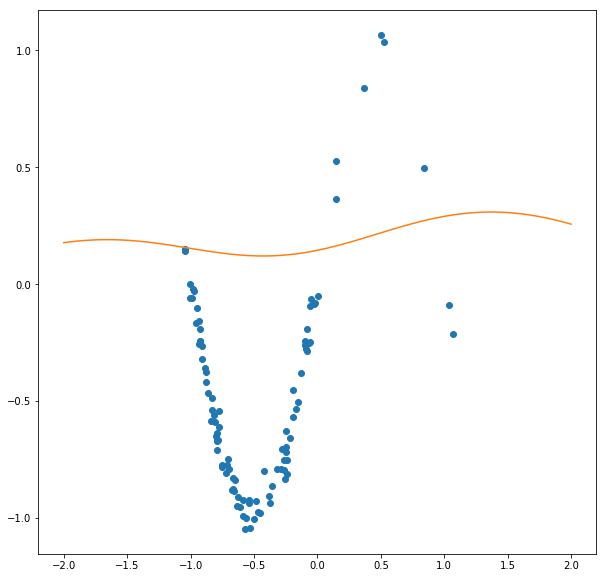

In [5]:
rbf_centers = np.linspace(-2,2,n_rbf).reshape(n_rbf,n_hidden)
rbf_covs = np.array([np.eye(n_hidden) for i in range(n_rbf)])
A = np.zeros((n_hidden,n_hidden))
b = np.zeros(n_hidden) 
C = np.zeros((n_outputs,n_hidden))
d = np.zeros(n_outputs)

A = 0.1 * np.random.randn(n_hidden,n_hidden)
b = 0.1 * np.random.randn(n_hidden) 
C = 0.1 * np.random.randn(n_outputs,n_hidden)
d = 0.1 * np.random.randn(n_outputs)

EM = EM_container(output, rbf_centers, rbf_covs, A, b, C, d)

plt.figure(figsize = (10,10))
plt.plot(true_hidden[:-1],true_hidden[1:],'o')
plt.plot(np.linspace(-2,2,200),[EM.f_estimator(x)[0][0] for x in np.linspace(-2,2,200)])
plt.show()

In [6]:
for i in tqdm.tqdm(range(max_iter)):
    EM.E_step()
    EM.M_step()

100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


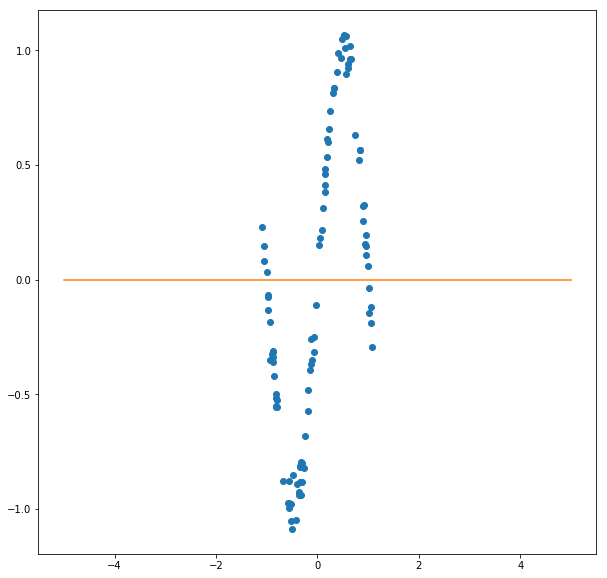

In [7]:
plt.figure(figsize = (10,10))
plt.plot(true_hidden[:-1],true_hidden[1:],'o')
plt.plot(np.linspace(-5,5,200),[EM.f_estimator(x)[0][0] for x in np.linspace(-5,5,200)])
plt.show()